# Financial Inclusion in Africa

O objetivo deste documento é realizar a análise dos dados e um modelo preditivo para predizer se uma pessoa tem ou não tem uma conta bancária utilizando as informações de inclusão financeira na África.

## Financial Inclusion Survey Data

De acordo com o site que disponibiliza o conjunto de dados, <a href = 'https://zindi.africa/competitions/financial-inclusion-in-africa/data'> Zindi</a>, o dataset principal contém informações demográficas e quais serviços financeiros são utilizados por aproximadamente 33.160 pessoas na África Oriental. Os dados foram extraídos de pesquisas nos anos de 2016 até 2018.

O dataset principal é divido em dois datasets: um de **treino** e outro para **testes** dos modelos.

In [62]:
ver = !python --version
print("Versão do python: " + str(ver))

Versão do python: ['Python 3.7.6']


In [78]:
#importando bibliotecas
import pandas as pd
import numpy as np
import missingno as mn
import matplotlib.pyplot as plt
import matplotlib.style as style
import seaborn as sns
%matplotlib inline

# setting up plot style 
style.use('seaborn-poster')
style.use('fivethirtyeight')

pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
pd.set_option('display.expand_frame_repr', False)
pd.options.display.max_colwidth = 500

In [64]:
#importando datasets
df_variaveis = pd.read_csv("VariableDefinitions.csv")
df = pd.read_csv("Train_v2.csv")

In [65]:
#conferindo
df.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


In [66]:
#dicionário do dataset:
df_variaveis

,Variable Definitions,Unnamed: 1
0,country,Country interviewee is in.
1,year,Year survey was done in.
2,uniqueid,Unique identifier for each interviewee
3,location_type,"Type of location: Rural, Urban"
4,cellphone_access,"If interviewee has access to a cellphone: Yes, No"
5,household_size,Number of people living in one house
6,age_of_respondent,The age of the interviewee
7,gender_of_respondent,"Gender of interviewee: Male, Female"
8,relationship_with_head,"The interviewee’s relationship with the head of the house:Head of Household, Spouse, Child, Parent, Other relative, Other non-relatives, Dont know"
9,marital_status,"The martial status of the interviewee: Married/Living together, Divorced/Seperated, Widowed, Single/Never Married, Don’t know"


## Data Wrangling e Data Cleaning

In [67]:
#fazendo uma cópia do dataset original

df_copy = df.copy()
df_copy.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


Primeiro vamos conferir algumas informações do dataset:

In [68]:
print("O dataset possui %s linhas e %s colunas." % (df_copy.shape[0], df_copy.shape[1]))

O dataset possui 23524 linhas e 13 colunas.


In [69]:
df_copy.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23524 entries, 0 to 23523
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   country                 23524 non-null  object
 1   year                    23524 non-null  int64 
 2   uniqueid                23524 non-null  object
 3   bank_account            23524 non-null  object
 4   location_type           23524 non-null  object
 5   cellphone_access        23524 non-null  object
 6   household_size          23524 non-null  int64 
 7   age_of_respondent       23524 non-null  int64 
 8   gender_of_respondent    23524 non-null  object
 9   relationship_with_head  23524 non-null  object
 10  marital_status          23524 non-null  object
 11  education_level         23524 non-null  object
 12  job_type                23524 non-null  object
dtypes: int64(3), object(10)
memory usage: 2.3+ MB


Podemos observar acima que não temos dados faltantes nesse dataset. Podemos utilizar a biblioteca **missingno** para analisarmos esta questão atraves de um gráfico. Vejamos:

<AxesSubplot:>

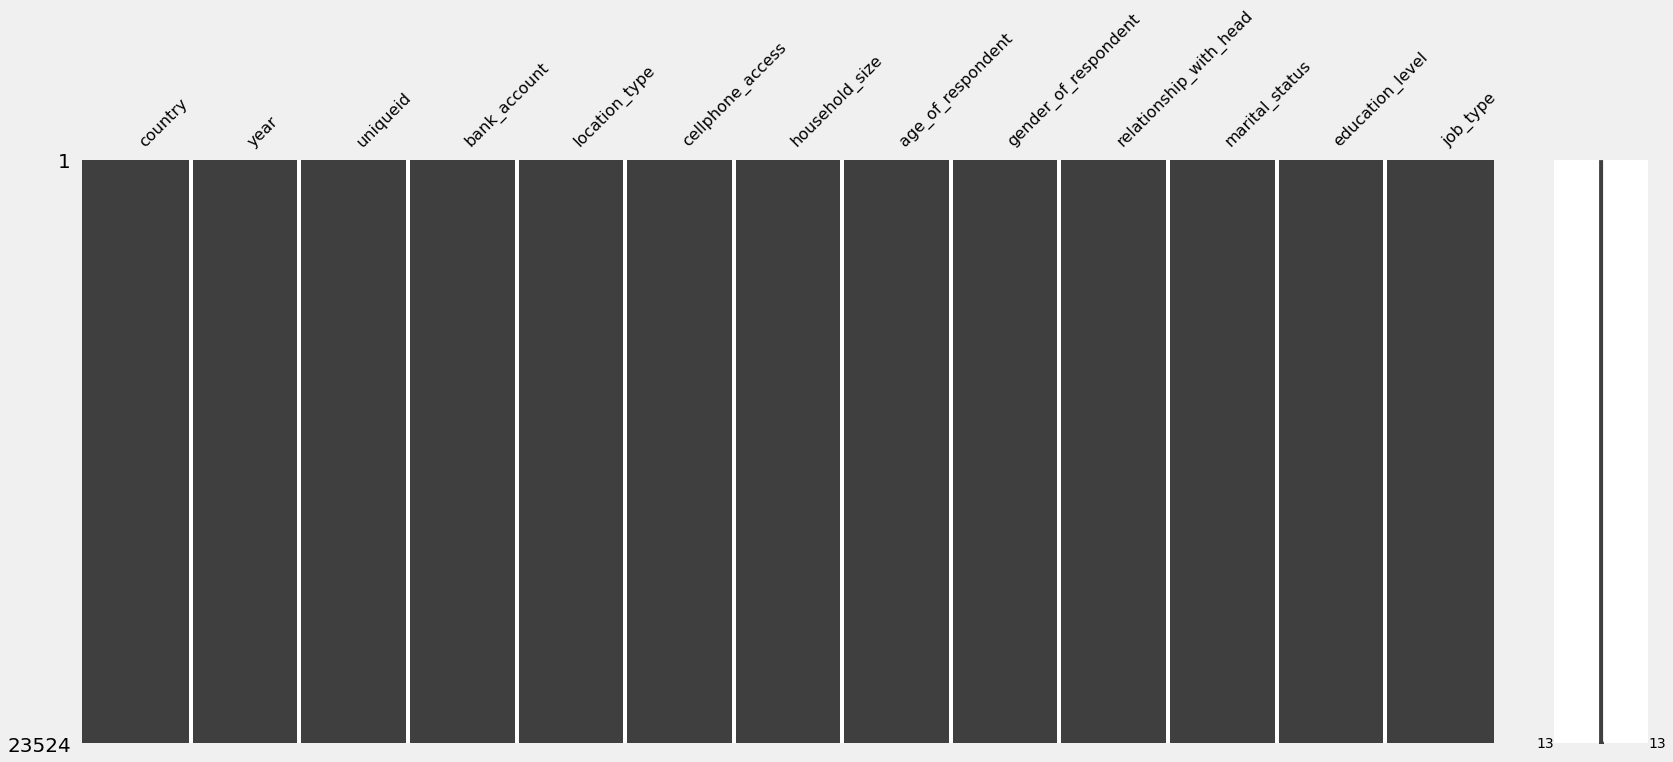

In [70]:
mn.matrix(df_copy)

### Campo uniqueid:

De acordo com a descrição das variáveis no site, o campo `uniqueid` representa a chave única do indivíduo no próprio país. Isso quer dizer que podemos ter o mesmo valor de `uniqueid` mas com países distintios. Para que este campo realmente represente uma chave única em nosso dataset, vamos unir com o a coluna `country`.

Dessa forma a coluna teremos o valor da chave única no seguinte formato: "uniqueid_x + country name"

In [71]:
#verificando:
df_copy[['uniqueid', 'country']].groupby('uniqueid').count()

,country
uniqueid,
uniqueid_1,4
uniqueid_10,4
uniqueid_100,4
uniqueid_1000,4
uniqueid_1001,4
...,...
uniqueid_995,4
uniqueid_996,4
uniqueid_997,4


**Code**

In [72]:
df_copy['uniqueid'] = df_copy['uniqueid'] + df_copy['country']

**Test**

In [73]:
df_copy.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type
0,Kenya,2018,uniqueid_1Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed
1,Kenya,2018,uniqueid_2Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent
2,Kenya,2018,uniqueid_3Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed
3,Kenya,2018,uniqueid_4Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private
4,Kenya,2018,uniqueid_5Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed


## Análise Exploratória dos Dados

Vejamos um resumo estatítstico das variáveis quantitativas:

In [77]:
df_copy.describe()

,year,household_size,age_of_respondent
count,23524.000000,23524.000000,23524.000000
mean,2016.975939,3.797483,38.805220
std,0.847371,2.227613,16.520569
min,2016.000000,1.000000,16.000000
25%,2016.000000,2.000000,26.000000
50%,2017.000000,3.000000,35.000000
75%,2018.000000,5.000000,49.000000
max,2018.000000,21.000000,100.000000


Rapidamente podemos observar alguns pontos:
- a idade média é de aporixmadamente 39 anos;
- os extremos mínimo e máximo são 16 anos e 100 anos respectivamente;
- o desvio padrão é de 16,5 anos, um número consideravelmente alto;
- o número médio de indivíduos em uma casa é de aproximadamente 4 pessoas; com desvio padrão de 2,2.
- o número máximo de indivíduos em uma casa é de 21 pessoas. Provavelmente trata-se de um outlier.

#### Distribuição da idade

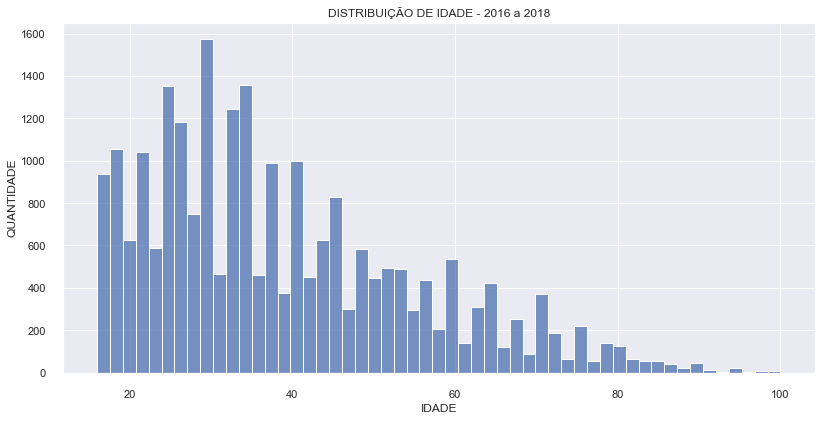

In [92]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.histplot(x="age_of_respondent", data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DE IDADE - 2016 a 2018',ylabel = 'FREQUÊNCIA', xlabel = 'IDADE')
plt.show()

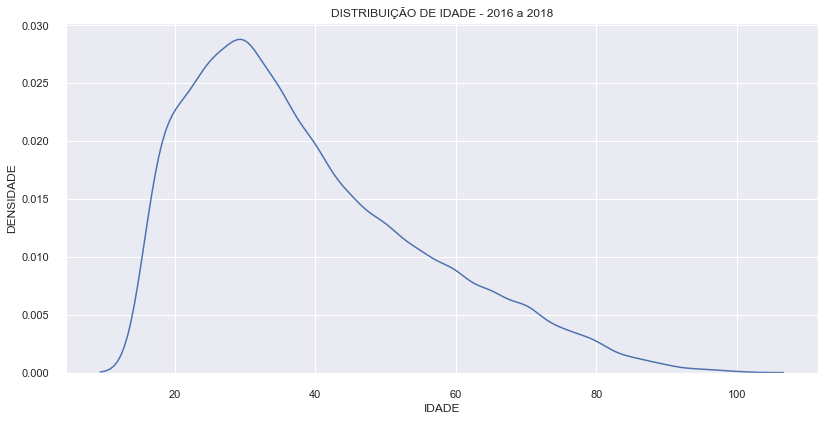

In [95]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.kdeplot(x="age_of_respondent", data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DE IDADE - 2016 a 2018',ylabel = 'DENSIDADE', xlabel = 'IDADE')
plt.show()

A distribuição da idade apresenta uma curva assimetrica à direita. Em distribições desse tipo temos a maioria dos valores concentrados abaixo do média; esta por sua vez é maior do que a mediana.

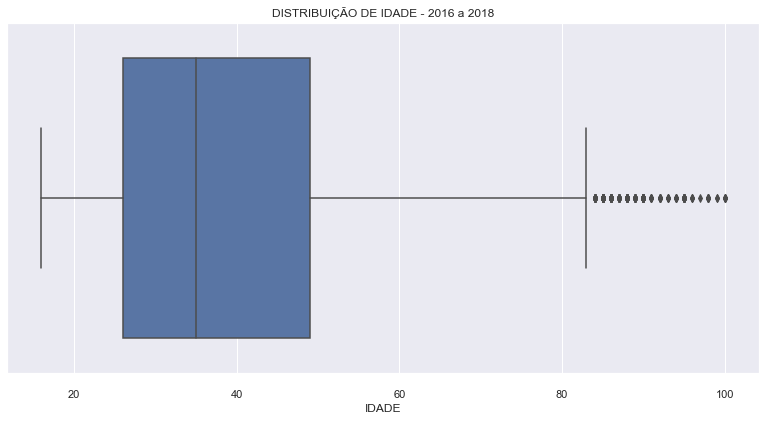

In [97]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.boxplot(x="age_of_respondent", data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DE IDADE - 2016 a 2018', xlabel = 'IDADE')
plt.show()

**Distribuição do tamanhao da família**

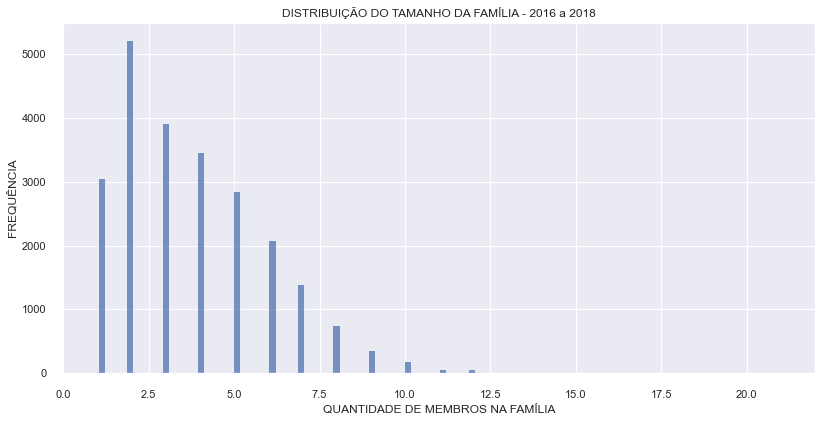

In [101]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.histplot(x="household_size", data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DO TAMANHO DA FAMÍLIA - 2016 a 2018',ylabel = 'FREQUÊNCIA',
       xlabel = 'QUANTIDADE DE MEMBROS NA FAMÍLIA')
plt.show()

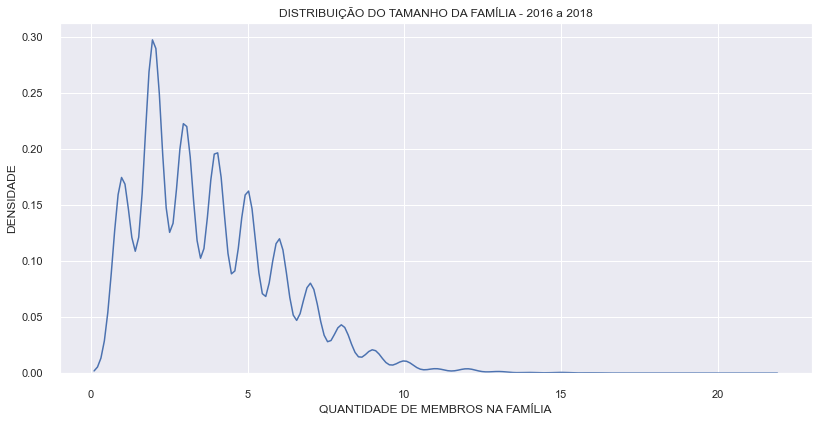

In [102]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.kdeplot(x="household_size", data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DO TAMANHO DA FAMÍLIA - 2016 a 2018',ylabel = 'DENSIDADE',
       xlabel = 'QUANTIDADE DE MEMBROS NA FAMÍLIA')
plt.show()

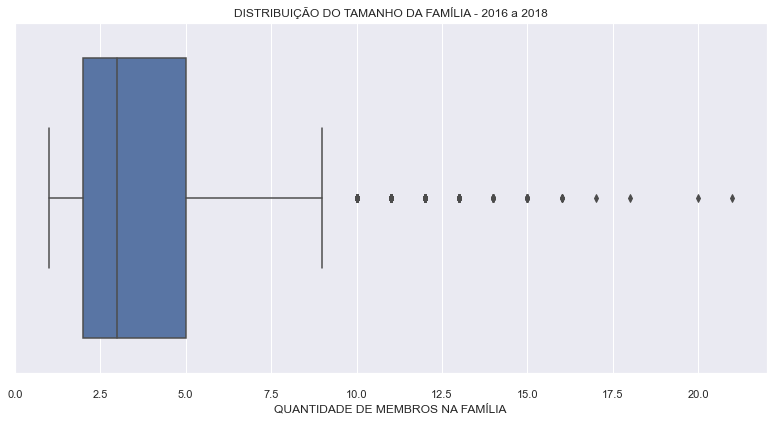

In [104]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.boxplot(x="household_size", data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DO TAMANHO DA FAMÍLIA - 2016 a 2018', xlabel = 'QUANTIDADE DE MEMBROS NA FAMÍLIA')
plt.show()

A distribição nesse caso também é assimétrica eniesada à direita, da mesma forma que a idade. Vejamos se há uma correlação entre ambas.

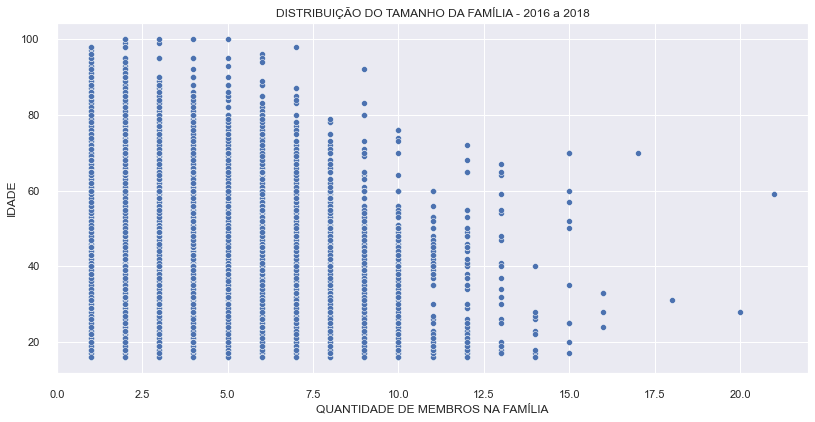

In [107]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.scatterplot(x="household_size", y = 'age_of_respondent', data = df_copy)
ax.set(title = 'DISTRIBUIÇÃO DO TAMANHO DA FAMÍLIA - 2016 a 2018', 
       xlabel = 'QUANTIDADE DE MEMBROS NA FAMÍLIA', ylabel = 'IDADE')
plt.show()

In [109]:
#coeficiente de Pearson:
df['household_size'].corr(df['age_of_respondent'])

-0.12972914326105414

De acordo com o coeficiente de <a href = 'https://pt.wikipedia.org/wiki/Coeficiente_de_correla%C3%A7%C3%A3o_de_Pearson'> Pearson</a>, bem como o comportamento do gráfico das duas variáveis, podemos concluir que não há correlação entre as duas variáveis.

### Análise Demográfica

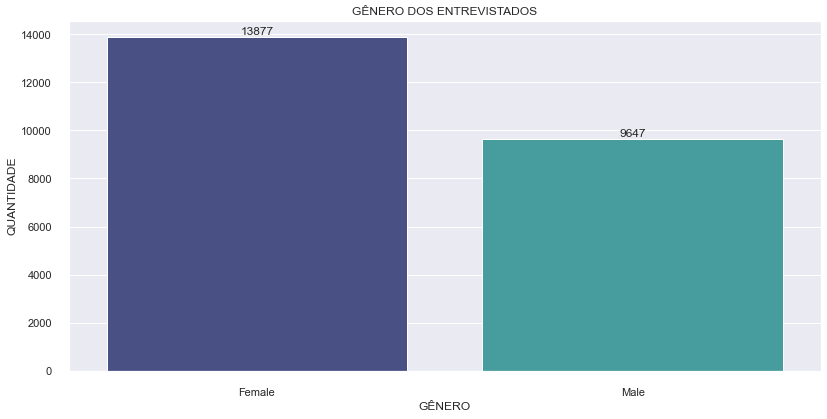

In [122]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.countplot(x = 'gender_of_respondent', data = df_copy, palette= "mako")
ax.set(title = "GÊNERO DOS ENTREVISTADOS", xlabel = "GÊNERO", ylabel = 'QUANTIDADE' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+100,
    s = '{:.0f}'.format(height),
    ha = 'center')

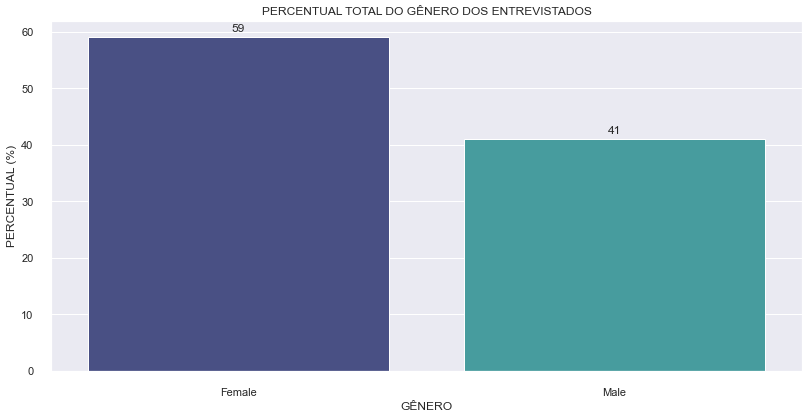

In [181]:
#percentual homens x mulheres:
temp = df_copy['gender_of_respondent'].value_counts().reset_index()
temp['percent'] = round((temp['gender_of_respondent']/sum(temp['gender_of_respondent'])*100))

sns.set(rc={'figure.figsize': (12,6)})
ax = sns.barplot(x = 'index', y = "percent", data = temp, palette= "mako")
ax.set(title = "PERCENTUAL TOTAL DO GÊNERO DOS ENTREVISTADOS", xlabel = "GÊNERO", ylabel = 'PERCENTUAL (%)' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+1,
    s = '{:.0f}'.format(height),
    ha = 'center')

plt.show()
#temp

Mais mulheres foram entrevistadas do que homens de acordo com os dados coletados, com 59% e 41% respectivamente.
Vejamos como se dá a distribuição de gênero por países

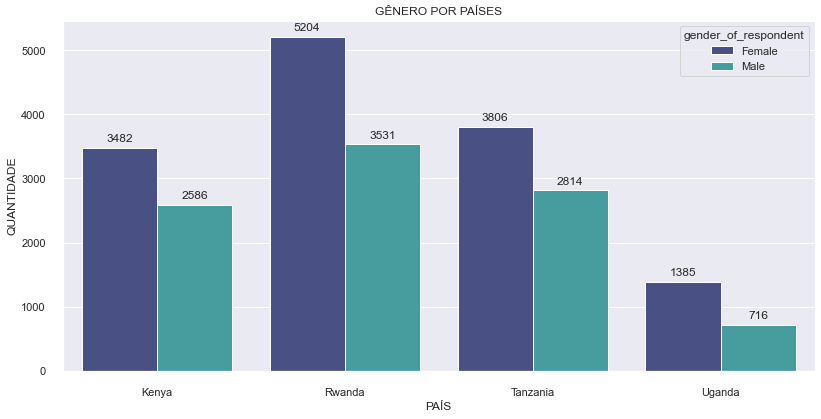

In [149]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.countplot(x = 'country', hue = 'gender_of_respondent', data = df_copy, palette= "mako")
ax.set(title = "GÊNERO POR PAÍSES", xlabel = "PAÍS", ylabel = 'QUANTIDADE' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+100,
    s = '{:.0f}'.format(height),
    ha = 'center')

Em todos os quatro países a quantidade de mulheres é maior que a de homens.
Vejamos agora o tipo de localização.

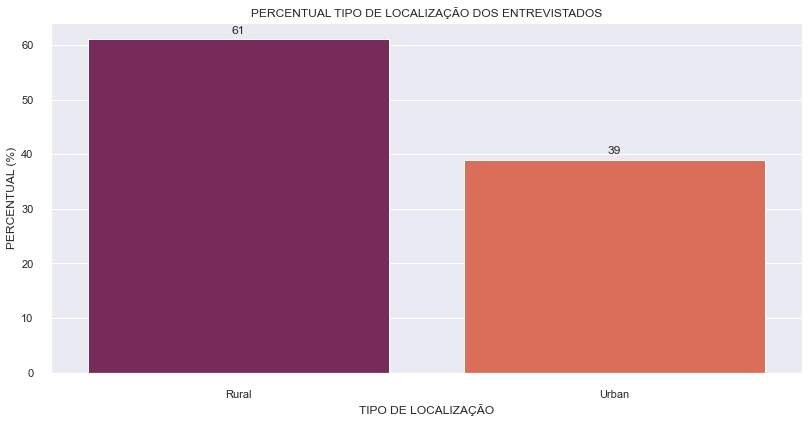

In [184]:
temp = df_copy['location_type'].value_counts().reset_index()
temp['percent'] = round((temp['location_type']/sum(temp['location_type']))*100)

sns.set(rc={'figure.figsize': (12,6)})
ax = sns.barplot(x = 'index', y = "percent", data = temp, palette= "rocket")
ax.set(title = "PERCENTUAL TIPO DE LOCALIZAÇÃO DOS ENTREVISTADOS", xlabel = "TIPO DE LOCALIZAÇÃO",
       ylabel = 'PERCENTUAL (%)' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+1,
    s = '{:.0f}'.format(height),
    ha = 'center')

plt.show()

61% dos entrevistados vivem na área rural. Vejamos essa distribuição por países:

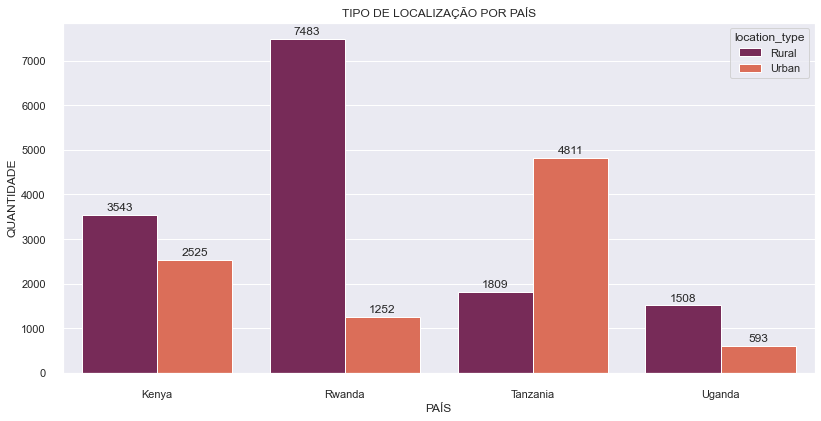

In [185]:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.countplot(x = 'country', hue = 'location_type', data = df_copy, palette= "rocket")
ax.set(title = "TIPO DE LOCALIZAÇÃO POR PAÍS", xlabel = "PAÍS", ylabel = 'QUANTIDADE' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+100,
    s = '{:.0f}'.format(height),
    ha = 'center')

A Tanzania possui a grande maioria dos indivíduos localizados na área rural. A Tanzânia é o único país onde a população urbana é maior do que a rural.

**Faixa Etária**

Vamos criar um dicionário para segmentar a faixa etária das pessoas de acordo com a <a href = 'https://pt.wikipedia.org/wiki/Predefini%C3%A7%C3%A3o:Faixas_et%C3%A1rias_do_Brasil'>Predefinição de faixas etárias no Brasil</a>.

- Criança (child): 0 a 14 anos;
- Jovem (young): 15 a 24 anos;
- Adulto (adult): 25 a 64 anos;
- Idoso (eldery): a partir de 65 anos;

In [189]:
#função para criar os valores da faixa etária
def idade(row):
    '''
    Função que vai passar pelas linhas do dataframe, coletar
    a idade correspondente e aplicar a segmentação correspondente
    '''
    if(row['age_of_respondent'] < 15):
        val = 'child'
    elif(row['age_of_respondent'] < 25):
        val = 'young'
    elif(row['age_of_respondent'] < 65):
        val = 'adult'
    else:
        val = 'elderly'
    return val

In [190]:
#criando a nova coluna no dataframe
df_copy['age_group'] = df_copy.apply(idade, axis=1)

#conferindo:
df_copy.head()

,country,year,uniqueid,bank_account,location_type,cellphone_access,household_size,age_of_respondent,gender_of_respondent,relationship_with_head,marital_status,education_level,job_type,age_group
0,Kenya,2018,uniqueid_1Kenya,Yes,Rural,Yes,3,24,Female,Spouse,Married/Living together,Secondary education,Self employed,young
1,Kenya,2018,uniqueid_2Kenya,No,Rural,No,5,70,Female,Head of Household,Widowed,No formal education,Government Dependent,elderly
2,Kenya,2018,uniqueid_3Kenya,Yes,Urban,Yes,5,26,Male,Other relative,Single/Never Married,Vocational/Specialised training,Self employed,adult
3,Kenya,2018,uniqueid_4Kenya,No,Rural,Yes,5,34,Female,Head of Household,Married/Living together,Primary education,Formally employed Private,adult
4,Kenya,2018,uniqueid_5Kenya,No,Urban,No,8,26,Male,Child,Single/Never Married,Primary education,Informally employed,adult


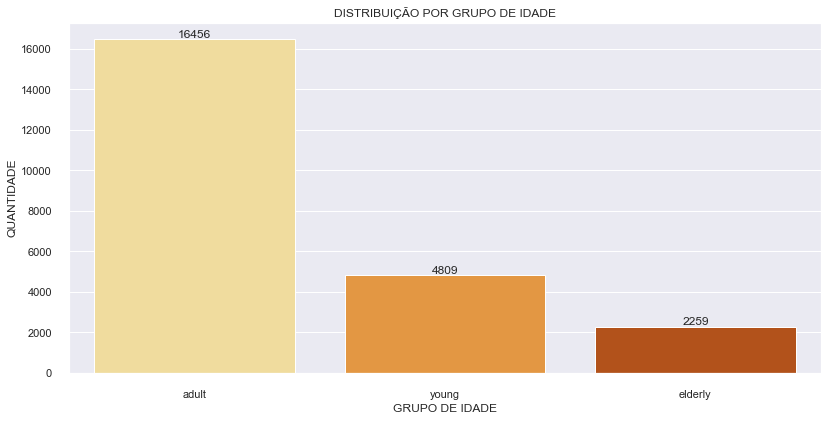

In [197]:
#plotando gráfico:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.countplot(x = 'age_group', data = df_copy, palette= "YlOrBr", order = df_copy['age_group'].value_counts().index)
ax.set(title = "DISTRIBUIÇÃO POR GRUPO DE IDADE", xlabel = "GRUPO DE IDADE", ylabel = 'QUANTIDADE' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+100,
    s = '{:.0f}'.format(height),
    ha = 'center')


A esmagadora maioria dos indivíduos são adultos (idade entre 25 a 64 anos). Vamos ver agora como seria essa segmentação de acordo com os países, assim podemos verificar se há um país mais jovem ou mais velho do que outro.

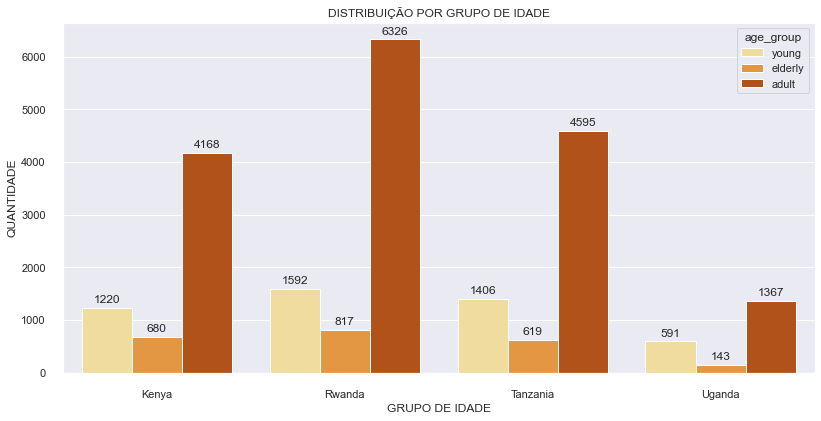

In [199]:
#plotando gráfico:
sns.set(rc={'figure.figsize': (12,6)})
ax = sns.countplot(x = 'country', data = df_copy, hue = 'age_group', palette= "YlOrBr")
ax.set(title = "DISTRIBUIÇÃO POR GRUPO DE IDADE", xlabel = "GRUPO DE IDADE", ylabel = 'QUANTIDADE' )

#adicionando labels acima das barras
for p in ax.patches:
    height = p.get_height() #altura das barras
    ax.text(x = p.get_x()+(p.get_width()/2),
    y = height+100,
    s = '{:.0f}'.format(height),
    ha = 'center')

Os países apresentam uma distribuição semelhante entre eles, com os adultos sendo a maoiria, seguido por pessoas jovens e por fim os idosos.

### Bancarização